# **Task 2: CREDIT RISK PREDICTION**


This task aims to predict whether a loan applicant is likely to default. The objective is to clean the credit dataset, handle missing values, analyze key features, and train a classification model to classify applicants as “good” or “bad” credit risk.

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## 1. LOAD DATASET

In [ ]:
df = pd.read_csv("/content/german_credit_data.csv")
print("Dataset shape:", df.shape)
print(df.head())


Dataset shape: (1000, 11)
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  


The dataset is relatively clean but contains categorical columns that need preprocessing

## 2. HANDLE MISSING VALUES

In [ ]:
# Separate numeric & categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical missing values with mode
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2777024391.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2777024391.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

This ensures zero missing values before encoding and model training.
Important because models like Logistic Regression cannot handle NaNs.

## 3. VISUALIZATION

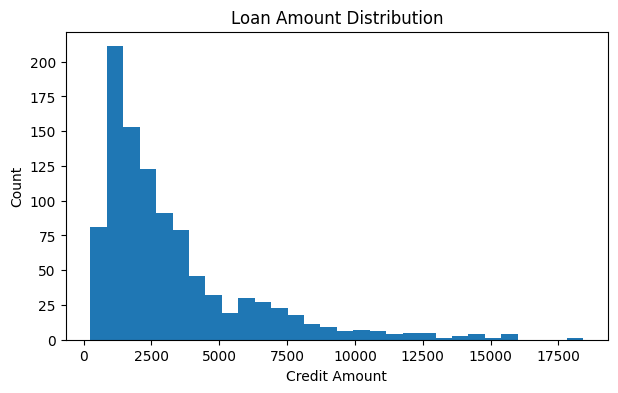

In [ ]:
# -------- Loan Amount Histogram ----------
loan_col = "Credit amount"
plt.figure(figsize=(7,4))
plt.hist(df[loan_col], bins=30)
plt.title("Loan Amount Distribution")
plt.xlabel("Credit Amount")
plt.ylabel("Count")
plt.show()

This lets you check:

Are most applicants taking small loans?

Does loan amount have extreme outliers?

Is the distribution skewed?

German Credit dataset is usually right-skewed (few very large loans).

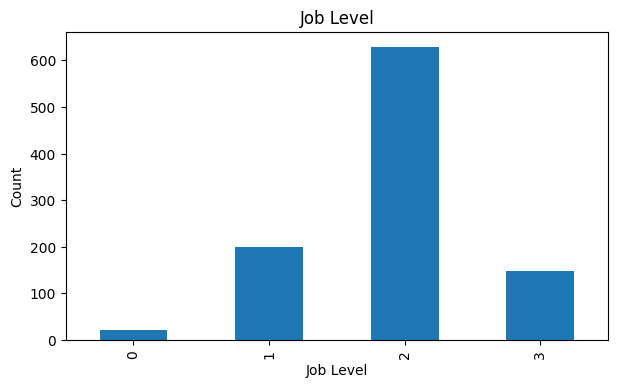

In [ ]:
if "Job" in df.columns:
    plt.figure(figsize=(7,4))
    df["Job"].value_counts().sort_index().plot(kind='bar')
    plt.title("Job Level")
    plt.xlabel("Job Level")
    plt.ylabel("Count")
    plt.show()


Age reveals:

Younger applicants might take riskier loans.

Older applicants typically show more stability.

Plotting age distribution helps identify patterns in age groups.

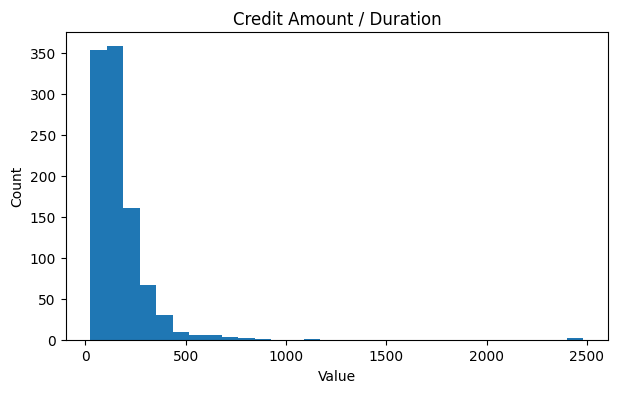

In [ ]:
df["Credit amount"] / df["Duration"]

plt.figure(figsize=(7,4))
plt.hist(df["income_proxy"], bins=30)
plt.title("Credit Amount / Duration")
plt.xlabel("Value")
plt.ylabel("Count")
plt.show()

Job type can substitute income level:
Very High income → stable job categories
Low income → unstable job or none

This plays a similar role in modeling credit risk.


## 4. FEATURE PREPARATION

In [ ]:
y = df["Risk"].map({"good": 1, "bad": 0})  # convert target to binary
X = df.drop(columns=["Risk", "Unnamed: 0"])  # remove target + unused column

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nFeature engineering completed.")
print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Feature engineering completed.
Training set: (800, 20)
Test set: (200, 20)


Machine learning models cannot use text directly.
One-hot encoding preserves the category meaning without ordinality.

Avoid overfitting because model accuracy is measured on unseen data.

Without scaling, large numerical features (like Credit Amount) would dominate the model.

#5. MODEL TRAINING

Train two models:

### **1. LOGISTIC REGRESSION**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("\n===============================")
print("LOGISTIC REGRESSION RESULTS")
print("===============================")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.695
Confusion Matrix:
 [[ 14  46]
 [ 15 125]]
              precision    recall  f1-score   support

           0       0.48      0.23      0.31        60
           1       0.73      0.89      0.80       140

    accuracy                           0.69       200
   macro avg       0.61      0.56      0.56       200
weighted avg       0.66      0.69      0.66       200



LOGISTIC REGRESSION Useful for linear relationships ,Predicts probability of default and good as a baseline model.

### **2. DECISION TREE CLASSIFIER**

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("\n===============================")
print("DECISION TREE RESULTS")
print("===============================")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))




DECISION TREE RESULTS
Accuracy: 0.705
Confusion Matrix:
 [[ 14  46]
 [ 13 127]]
              precision    recall  f1-score   support

           0       0.52      0.23      0.32        60
           1       0.73      0.91      0.81       140

    accuracy                           0.70       200
   macro avg       0.63      0.57      0.57       200
weighted avg       0.67      0.70      0.66       200



Decision Tree Classifier is useful for nonlinear interactions. It Captures patterns like:

“If Checking Account is low AND Loan Amount is high → High default risk”

Trees handle category interactions very well.